In [1]:
# https://3months.tistory.com/168

In [2]:
import pandas as pd

df = pd.read_csv('c:/data/time/data2.csv')
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_5092\3028398692.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,date,price
0,1991-01-01,12588862
1,1991-02-01,12154321
2,1991-03-01,14337072
3,1991-04-01,15108570
4,1991-05-01,17225734


In [3]:
# 전처리
# 문자열 변수 date 를 datetime 타입으로 변경
df['date'] = pd.to_datetime(df['date'])

# 이 날짜를 index로 설정
df = df.set_index('date')
df.head()

,price
date,
1991-01-01,12588862
1991-02-01,12154321
1991-03-01,14337072
1991-04-01,15108570
1991-05-01,17225734


<Axes: xlabel='date'>

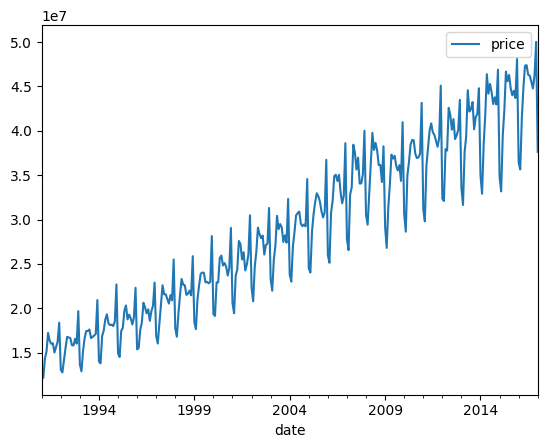

In [4]:
df.plot()

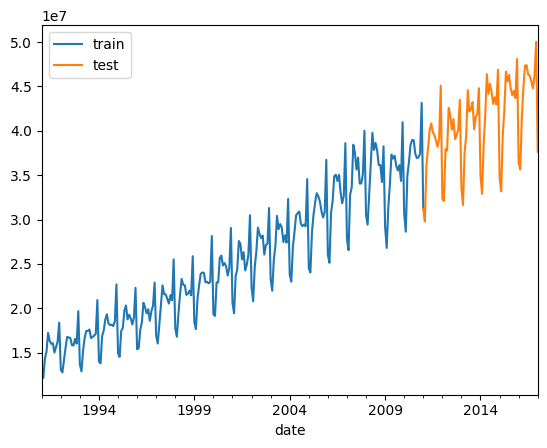

In [5]:
# 인덱스가 0,1,2,3 ... 에서 날짜로 변경됨
# 학습할 변수는 date
import matplotlib.pyplot as plt

split_date = pd.Timestamp('01-01-2011')

# 학습용: 2011/1/1까지의 자료
# 검증용: 이후 자료
train = df.loc[:split_date, ['price']]
test = df.loc[split_date:, ['price']]
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [6]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
sc.fit(train)
train_sc = sc.transform(train)
test_sc = sc.transform(test)
train_sc[:10]

array([[0.01402033],
       [0.        ],
       [0.0704258 ],
       [0.09531795],
       [0.16362761],
       [0.13514108],
       [0.12395846],
       [0.12617398],
       [0.09230917],
       [0.11139526]])

In [7]:
# 넘파이배열을 데이터프레임으로 변환

train_sc_df = pd.DataFrame(train_sc, columns=['Scaled'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Scaled'], index=test.index)

train_sc_df.head()

,Scaled
date,
1991-01-01,0.014020
1991-02-01,0.000000
1991-03-01,0.070426
1991-04-01,0.095318
1991-05-01,0.163628


In [8]:
s = pd.Series([100, 200, 300])
s2 = s.shift(1) 

print(s)
print(s2)

0    100
1    200
2    300
dtype: int64
0      NaN
1    100.0
2    200.0
dtype: float64


In [9]:
for s in range(1, 13):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['Scaled'].shift(s)
train_sc_df.head(13)

# 과거값 12개로 현재값을 예측하고자 함

,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
date,,,,,,,,,,,,,
1991-01-01,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-02-01,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-03-01,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-01,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-05-01,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-06-01,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-07-01,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN
1991-08-01,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN
1991-09-01,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN


In [10]:
# 결측값 NaN 제거

# 독립변수 : shift_1 ~ shift_12

X_train = train_sc_df.dropna().drop('Scaled', axis=1)

# 종속변수 : Scaled

y_train = train_sc_df.dropna()[['Scaled']]

X_test = test_sc_df.dropna().drop('Scaled', axis=1)

y_test = test_sc_df.dropna()[['Scaled']]

In [11]:
# 넘파이배열로 저장
X_train = X_train.values
X_test= X_test.values
y_train = y_train.values
y_test = y_test.values

# print(X_train.shape)
print(X_train)
# print(y_train_shape)
print(y_train)

[[0.20091289 0.13173822 0.11139526 ... 0.0704258  0.         0.01402033]
 [0.03002688 0.20091289 0.13173822 ... 0.09531795 0.0704258  0.        ]
 [0.01999285 0.03002688 0.20091289 ... 0.16362761 0.09531795 0.0704258 ]
 ...
 [0.80210057 0.79916654 0.81439355 ... 0.59734863 0.92972161 0.71629034]
 [0.81482896 0.80210057 0.79916654 ... 0.53166512 0.59734863 0.92972161]
 [1.         0.81482896 0.80210057 ... 0.73605008 0.53166512 0.59734863]]
[[0.03002688]
 [0.01999285]
 [0.06596369]
 [0.10983126]
 [0.14912986]
 [0.14718865]
 [0.14464787]
 [0.11898427]
 [0.11802682]
 [0.14222108]
 [0.12459168]
 [0.24290801]
 [0.04899091]
 [0.02408276]
 [0.09865054]
 [0.14480155]
 [0.17061844]
 [0.17067229]
 [0.17603636]
 [0.1449117 ]
 [0.14957943]
 [0.15381982]
 [0.16036484]
 [0.28308682]
 [0.05971347]
 [0.05306762]
 [0.15199345]
 [0.17230214]
 [0.21246911]
 [0.23131079]
 [0.1982186 ]
 [0.19187716]
 [0.19381714]
 [0.18857277]
 [0.20528237]
 [0.33988685]
 [0.08949179]
 [0.07634802]
 [0.17110473]
 [0.181320

In [12]:
# 케라스에 필요한 3차원 형태로 변환
# RNN에는 시간 개념이 있기 때문에 차원이 추가됨
# [size,timestep,변수개수]

X_train_t = X_train.reshape(X_train.shape[0], 12, 1)
X_test_t = X_test.reshape(X_test.shape[0], 12, 1)

print("최종 DATA")
print(X_train_t.shape)
print(X_train_t)
print(y_train)

최종 DATA
(229, 12, 1)
[[[0.20091289]
  [0.13173822]
  [0.11139526]
  ...
  [0.0704258 ]
  [0.        ]
  [0.01402033]]

 [[0.03002688]
  [0.20091289]
  [0.13173822]
  ...
  [0.09531795]
  [0.0704258 ]
  [0.        ]]

 [[0.01999285]
  [0.03002688]
  [0.20091289]
  ...
  [0.16362761]
  [0.09531795]
  [0.0704258 ]]

 ...

 [[0.80210057]
  [0.79916654]
  [0.81439355]
  ...
  [0.59734863]
  [0.92972161]
  [0.71629034]]

 [[0.81482896]
  [0.80210057]
  [0.79916654]
  ...
  [0.53166512]
  [0.59734863]
  [0.92972161]]

 [[1.        ]
  [0.81482896]
  [0.80210057]
  ...
  [0.73605008]
  [0.53166512]
  [0.59734863]]]
[[0.03002688]
 [0.01999285]
 [0.06596369]
 [0.10983126]
 [0.14912986]
 [0.14718865]
 [0.14464787]
 [0.11898427]
 [0.11802682]
 [0.14222108]
 [0.12459168]
 [0.24290801]
 [0.04899091]
 [0.02408276]
 [0.09865054]
 [0.14480155]
 [0.17061844]
 [0.17067229]
 [0.17603636]
 [0.1449117 ]
 [0.14957943]
 [0.15381982]
 [0.16036484]
 [0.28308682]
 [0.05971347]
 [0.05306762]
 [0.15199345]
 [0.172

In [13]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(LSTM(20, input_shape=(12, 1))) # (timestep, 변수개수)
model.add(Dense(1)) # 출력층의 노드 개수 1

# mean_squared_error 연속적인 값 예측
model.compile(loss='mse', optimizer='adam')

c:\python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.fit(X_train_t, y_train, epochs=250, batch_size=64, verbose=1)

Epoch 1/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4187  
Epoch 2/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3436 
Epoch 3/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2770 
Epoch 4/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2476 
Epoch 5/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1869 
Epoch 6/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1626 
Epoch 7/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1230 
Epoch 8/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1008 
Epoch 9/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0702 
Epoch 10/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0531 
Epoch 11/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0360 
Epoch 12/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0248 
Epoch 13/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0195 
Epoch 14/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0182 
Epoch 15/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0189 
Epoch 16/250
4/4 ━

In [15]:
score=model.evaluate(X_test_t, y_test, verbose=0)
print(score) # 평균제곱오차

y_pred = model.predict(X_test_t)
print(y_pred.flatten()[:10])
print(y_test.flatten()[:10])

0.01004414726048708
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
[0.74375755 0.75328493 0.8279255  0.85367733 0.8733617  0.8789627
 0.8673123  0.8621035  0.85497546 0.8496444 ]
[0.65198848 0.6431242  0.83176496 0.82666946 0.98182284 0.95616179
 0.90265615 0.94107108 0.86841056 0.88189991]


In [16]:
import numpy as np

# 실제값-예측값의 평균값
np.mean(y_test - y_pred)

0.04349346650054403

In [17]:
y_predicted = sc.inverse_transform(y_pred)  
y_tested = sc.inverse_transform(y_test)  

np.mean(y_tested - y_predicted)

1348020.68852459

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


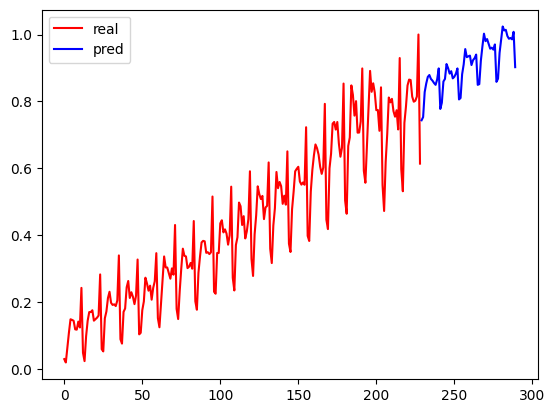

In [18]:
import matplotlib.pyplot as plt

pred=model.predict(X_test_t)

a=np.concatenate((y_train.flatten(), np.zeros(len(y_test))+np.nan))
b=np.concatenate((np.zeros(len(y_train))+np.nan, pred.flatten()))

plt.plot(a, 'r-', label='real')
plt.plot(b, 'b-', label='pred')
plt.legend()
plt.show()